##  Introduction

- **Artificial intelligence**, or AI, is concerned with building systems that simulate intelligent
behavior. It encompasses a wide range of approaches, including those based on logic,
search, and probabilistic reasoning. 
    
- **Machine learning** is a subset of AI that learns to make decisions by fitting mathematical models to observed data.

- **A deep neural network** (or deep network for short) is a type of machine learning
model, and the process of fitting these models to data is referred to as deep learning

### Key components of any machine learning problem

1- The data that we can learn from.

2- A model of how to transform the data.

3- An objective function that quantifies how well (or badly) the model is doing.

4- An algorithm to adjust the model’s parameters to optimize the objective function.





### Kinds of Machine Learning Problems

- Supervised Learning
    - Regression
    - Classification (binary and multiclass)
    - Tagging: multi-label
    - Ranking
    - Recommender Systems
    - Sequence Learning
- Unsupervised and Self-Supervised Learning
- Reinforcement Learning


<img src="img/pic1.svg" width=400 height=400 />

## Linear Regression

A 1D linear regression model describes the relationship between input x and output y as a straight line:

### Model

$y = f[x, w]$

$  = w_{0}+w_{1}x$

### Parameters

This model has two parameters $w = [w_{0},w_{1}]$, where $w_{0}$ is the y-intercept of the line and $w_{1}$ is the slope

### Loss function

We need a principled approach for deciding which parameters $w$ are better than others. To this end, we assign a numerical value to each choice of parameters that quantifies the degree of mismatch between the model and the data. 

We term this value the loss; a lower loss means a better fit.


The mismatch is captured by the deviation between the model predictions $f[x_{i},w]$ and the ground truth outputs $y_{i}$. 

We quantify the total mismatch, training error, or loss as the sum of the squares of these deviations for all I training pairs

$L[w] = \sum_{i=1}^{I} (f[x_{i}, w] − y_{i})^2$

$L[w] = \sum_{i=1}^{I} (w_{0}+w_{1}x_{i} − y_{i})^2$

- Since the best parameters minimize this expression, we call this a **least-squares loss**.
- The squaring operation means that the direction of the deviation above or below the data is unimportant

### Optimization

The goal is to find the parameters $w$ that minimize this quantity:

$w = argmin_{w} L[w]$

### Training

The process of finding parameters that minimize the loss is termed model fitting, training, or learning. 

- The basic method is to choose the initial parameters randomly and then improve them by “walking down” the loss function until we reach the bottom.
- One way to do this is to measure the gradient of the surface at the current position and take a step in the direction that is most steeply downhill.
- Then we repeat this process until the gradient is flat and we can improve no further

<img src="img/pic2.png" width=600 height=600 />

### Testing

Having trained the model, we want to know how it will perform in the real world. 

- We do this by computing the loss on a separate set of test data. The degree to which the prediction accuracy **generalizes** to the test data depends in part on how representative and complete the training data is. However, it also depends on how expressive the model is.

- A simple model like a line might not be able to capture the true relationship between input and output. This is known as **underfitting**. Conversely, a very expressive model may describe statistical peculiarities of the training data that are atypical and lead to unusual predictions. This is known as **overfitting**.

### Implementation of Linear Regression

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

In [16]:
class Regression:

    def __init__(self, dim):
        self.w = np.zeros((dim, 1))
        self.ws = [self.w.copy()]
        self.eta = 0.01
        
    def predict(self,x):
        # Make prediction 
        pred = x @ self.w
        return pred
    
    def grad(self,T,pred,x):
        ## the gradient of the sum of squared errors with respect to w
        grd = - (T - pred) * x
        return grd
    
    def model_update(self,grd):
        # Update w: take a smallstep in the direction of the negative gradient
        self.w -= self.eta * grd

In [17]:
nSamples = 100
X = np.random.uniform(0, 10, size=(nSamples, 1))
rnd = np.random.normal(0, 0.2, size=(nSamples, 1))
T = 2 - 0.1 * X + rnd + 0.00 * (X - 3)**2 
# Change 0 to 0.05 to try to fit nonlinear data

X1 = np.insert(X, 0, 1, axis=1) ## insert bias

X1.shape, T.shape

((100, 2), (100, 1))

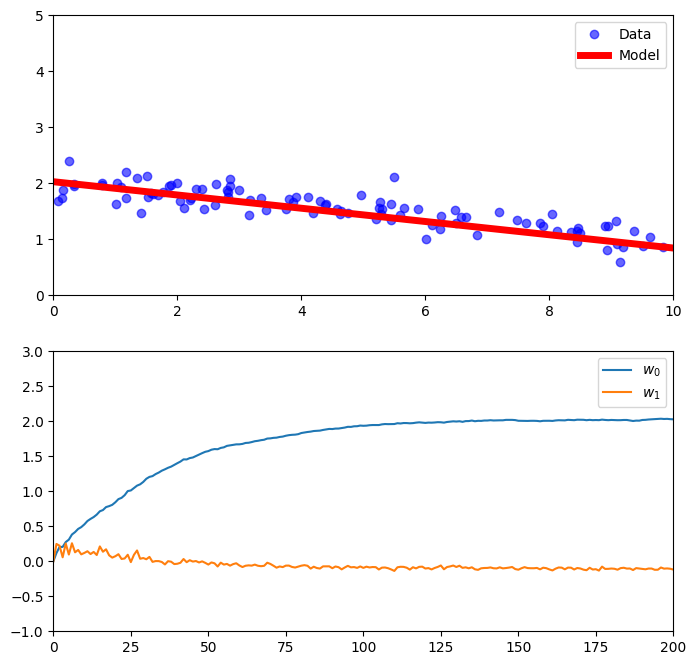

In [18]:
nFrames = 2000
nUpdatesPerFrame = 10
nIterations = nFrames // nUpdatesPerFrame

model = Regression(X1.shape[1])

fig = plt.figure(figsize=(8, 8))

for step in range(nIterations):
    
    plt.clf()
    
    for i in range(nUpdatesPerFrame):
        step += 1
        #n = step % nSamples
        n = np.random.randint(0,100, size=1)[0]
        
        predicted = model.predict(X1[n:n+1, :])
        
        grd = model.grad(T[n:n+1, :],predicted,X1[n:n+1, :].T) 
        
        model.model_update(grd)
        
        
    model.ws.append(model.w.copy())
 
    plt.subplot(2, 1, 1)
    plt.plot(X, T, 'bo', alpha=0.6)
    xs = np.linspace(0, 10, 100).reshape((-1, 1))
    xs1 = np.insert(xs, 0, 1, axis=1)
    plt.plot(xs, xs1 @ model.w, 'r-', linewidth=5)
    plt.legend(('Data','Model'), loc='upper right')
    plt.xlim(0, 10)
    plt.ylim(0, 5)

    plt.subplot(2, 1, 2)
    plt.plot(np.array(model.ws)[:, :, 0])
    plt.xlim(0, nIterations)
    plt.ylim(-1, 3)
    plt.legend(('$w_0$', '$w_1$'))

    ipd.clear_output(wait=True)
    ipd.display(fig)
    
ipd.clear_output(wait=True)